# 1. Imports e Configurações

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais para os gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

print("Bibliotecas para modelagem importadas com sucesso.")

Bibliotecas para modelagem importadas com sucesso.


# 2. Carregar os Dados Processados

In [2]:
# Carregar o DataFrame limpo e processado que guardámos no notebook anterior
caminho_processado = '../data/dados_processados_trimestrais.csv'
df_final = pd.read_csv(caminho_processado, index_col='Data', parse_dates=True) # Carrega o DataFrame com a coluna 'Data' como índice de datas

print("Dados processados carregados com sucesso.")
print(f"Dimensões do DataFrame: {df_final.shape}")
print("Primeiras 5 linhas:")
display(df_final.head())
print("Últimas 5 linhas:")
display(df_final.tail())

Dados processados carregados com sucesso.
Dimensões do DataFrame: (70, 4)
Primeiras 5 linhas:


,PIB_var_homologa,Credito_Empresas_Total,Credito_Particulares_Total,Endividamento_Total
Data,,,,
2007-12-31,3.0,4877.6,11.6,156083.31
2008-03-31,1.7,5278.5,11.8,158296.02
2008-06-30,0.9,6077.3,13.0,160952.95
2008-09-30,0.5,6898.4,14.1,162444.83
2008-12-31,-1.9,7738.9,14.7,163756.38


Últimas 5 linhas:


,PIB_var_homologa,Credito_Empresas_Total,Credito_Particulares_Total,Endividamento_Total
Data,,,,
2024-03-31,1.4,4503.1,7.9,154016.14
2024-06-30,1.5,4449.8,8.0,155512.53
2024-09-30,2.0,4483.6,8.1,157050.30
2024-12-31,2.8,4341.9,8.0,159183.62
2025-03-31,1.6,4191.2,7.6,161447.65


# 3. Normalização dos Dados (Scaling)

In [3]:
# A normalização é o primeiro passo da preparação para a modelagem.
# Usamos o StandardScaler para que cada variável tenha média 0 e desvio padrão 1.

scaler = StandardScaler() # Inicializa o escalador
scaled_data = scaler.fit_transform(df_final) # Aplica o escalador aos dados do DataFrame

# Criar um novo DataFrame com os dados normalizados
df_scaled = pd.DataFrame(scaled_data, index=df_final.index, columns=df_final.columns) # Cria um DataFrame com os dados normalizados, mantendo o índice de datas e os nomes das colunas

print("Dados normalizados (scaled) com sucesso.")
print("\nDescrição estatística dos dados normalizados (média ~0, desvio ~1):")
display(df_scaled.describe().round(2))

Dados normalizados (scaled) com sucesso.

Descrição estatística dos dados normalizados (média ~0, desvio ~1):


,PIB_var_homologa,Credito_Empresas_Total,Credito_Particulares_Total,Endividamento_Total
count,70.00,70.00,70.00,70.00
mean,0.00,-0.00,0.00,-0.00
std,1.01,1.01,1.01,1.01
min,-4.25,-1.16,-1.53,-1.50
25%,-0.54,-0.97,-0.88,-0.82
50%,0.17,-0.27,-0.14,0.12
75%,0.45,0.99,1.02,0.87
max,3.57,1.66,1.59,1.69


# 5. Modelagem com Isolation Forest

In [4]:
# 1. Inicializar o modelo Isolation Forest
# O parâmetro 'contamination' é o mais importante. Ele representa a proporção de anomalias que esperamos encontrar nos dados.
# Um valor de 0.1 significa que esperamos que cerca de 10% dos dados sejam anomalias. Podemos ajustar este valor mais tarde.
# 'random_state' é usado para garantir que os resultados sejam reprodutíveis.
model = IsolationForest(
    n_estimators=100,
    contamination=0.1,
    random_state=42
)

# 2. Treinar o modelo com os dados normalizados
model.fit(df_scaled)

# 3. Obter as previsões de anomalias
# O modelo devolve -1 para anomalias e 1 para pontos normais.
# Vamos adicionar esta informação de volta ao nosso DataFrame original (df_final) para facilitar a análise.
df_final['anomaly_score'] = model.decision_function(df_scaled) # Score de anomalia (quanto menor, mais anómalo)
df_final['anomaly'] = model.predict(df_scaled)

print("Modelo Isolation Forest treinado e previsões realizadas.")

# 4. Visualizar os resultados
print("\nPrimeiras linhas do DataFrame com os scores e as anomalias:")
display(df_final.head())

print("\nContagem de pontos normais (1) e anomalias (-1):")
display(df_final['anomaly'].value_counts())

Modelo Isolation Forest treinado e previsões realizadas.

Primeiras linhas do DataFrame com os scores e as anomalias:


,PIB_var_homologa,Credito_Empresas_Total,Credito_Particulares_Total,Endividamento_Total,anomaly_score,anomaly
Data,,,,,,
2007-12-31,3.0,4877.6,11.6,156083.31,0.088301,1
2008-03-31,1.7,5278.5,11.8,158296.02,0.075708,1
2008-06-30,0.9,6077.3,13.0,160952.95,0.064095,1
2008-09-30,0.5,6898.4,14.1,162444.83,0.072763,1
2008-12-31,-1.9,7738.9,14.7,163756.38,0.057461,1



Contagem de pontos normais (1) e anomalias (-1):


anomaly
 1    63
-1     7
Name: count, dtype: int64

# 6. Visualização das anomalias detetadas

Total de pontos anómalos identificados: 7

Datas das anomalias:


DatetimeIndex(['2012-06-30', '2012-09-30', '2012-12-31', '2020-06-30',
               '2021-06-30', '2022-03-31', '2025-03-31'],
              dtype='datetime64[ns]', name='Data', freq=None)

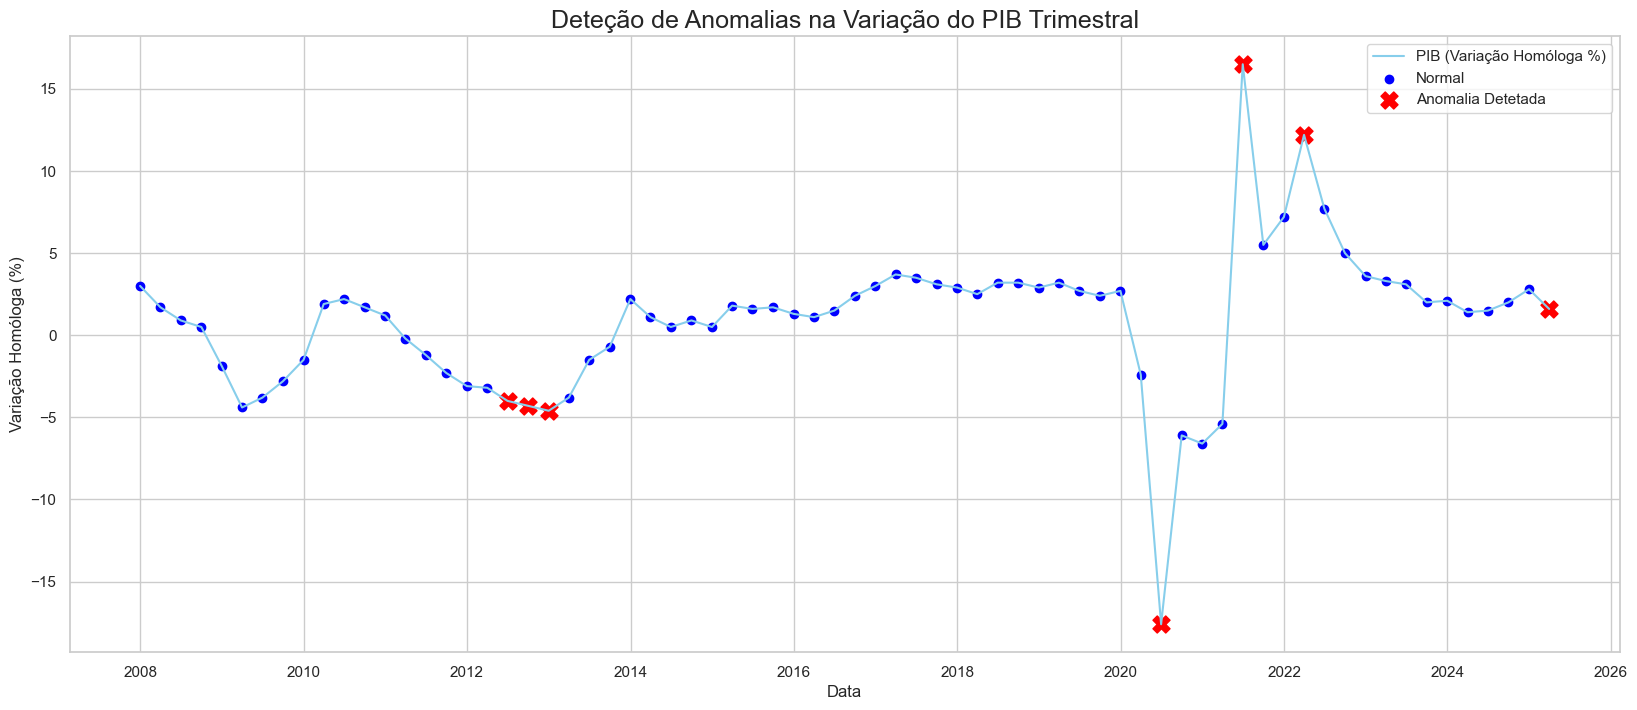

In [5]:
# 1. Separar os dados em normais e anómalos para podermos plotá-los com cores diferentes
df_anomalias = df_final[df_final['anomaly'] == -1]
df_normais = df_final[df_final['anomaly'] == 1]

print(f"Total de pontos anómalos identificados: {len(df_anomalias)}")
print("\nDatas das anomalias:")
display(df_anomalias.index) # Mostra as datas exatas dos trimestres anómalos

# 2. Criar o gráfico
plt.figure(figsize=(20, 8))

# Plotar a série temporal completa (PIB), escolhi o PIB porque é uma métrica central para a economia e é um bom exemplo para detecção de anomalias
plt.plot(df_final.index, df_final['PIB_var_homologa'], color='skyblue', label='PIB (Variação Homóloga %)') 

# Destacar os pontos normais com um ponto azul
plt.scatter(df_normais.index, df_normais['PIB_var_homologa'], color='blue', label='Normal')

# Destacar os pontos anómalos com um 'X' vermelho, tornando-os bem visíveis
plt.scatter(df_anomalias.index, df_anomalias['PIB_var_homologa'], color='red', marker='X', s=150, label='Anomalia Detetada')

# 3. Melhorar o gráfico com títulos e legendas
plt.title('Deteção de Anomalias na Variação do PIB Trimestral', fontsize=18)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Variação Homóloga (%)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

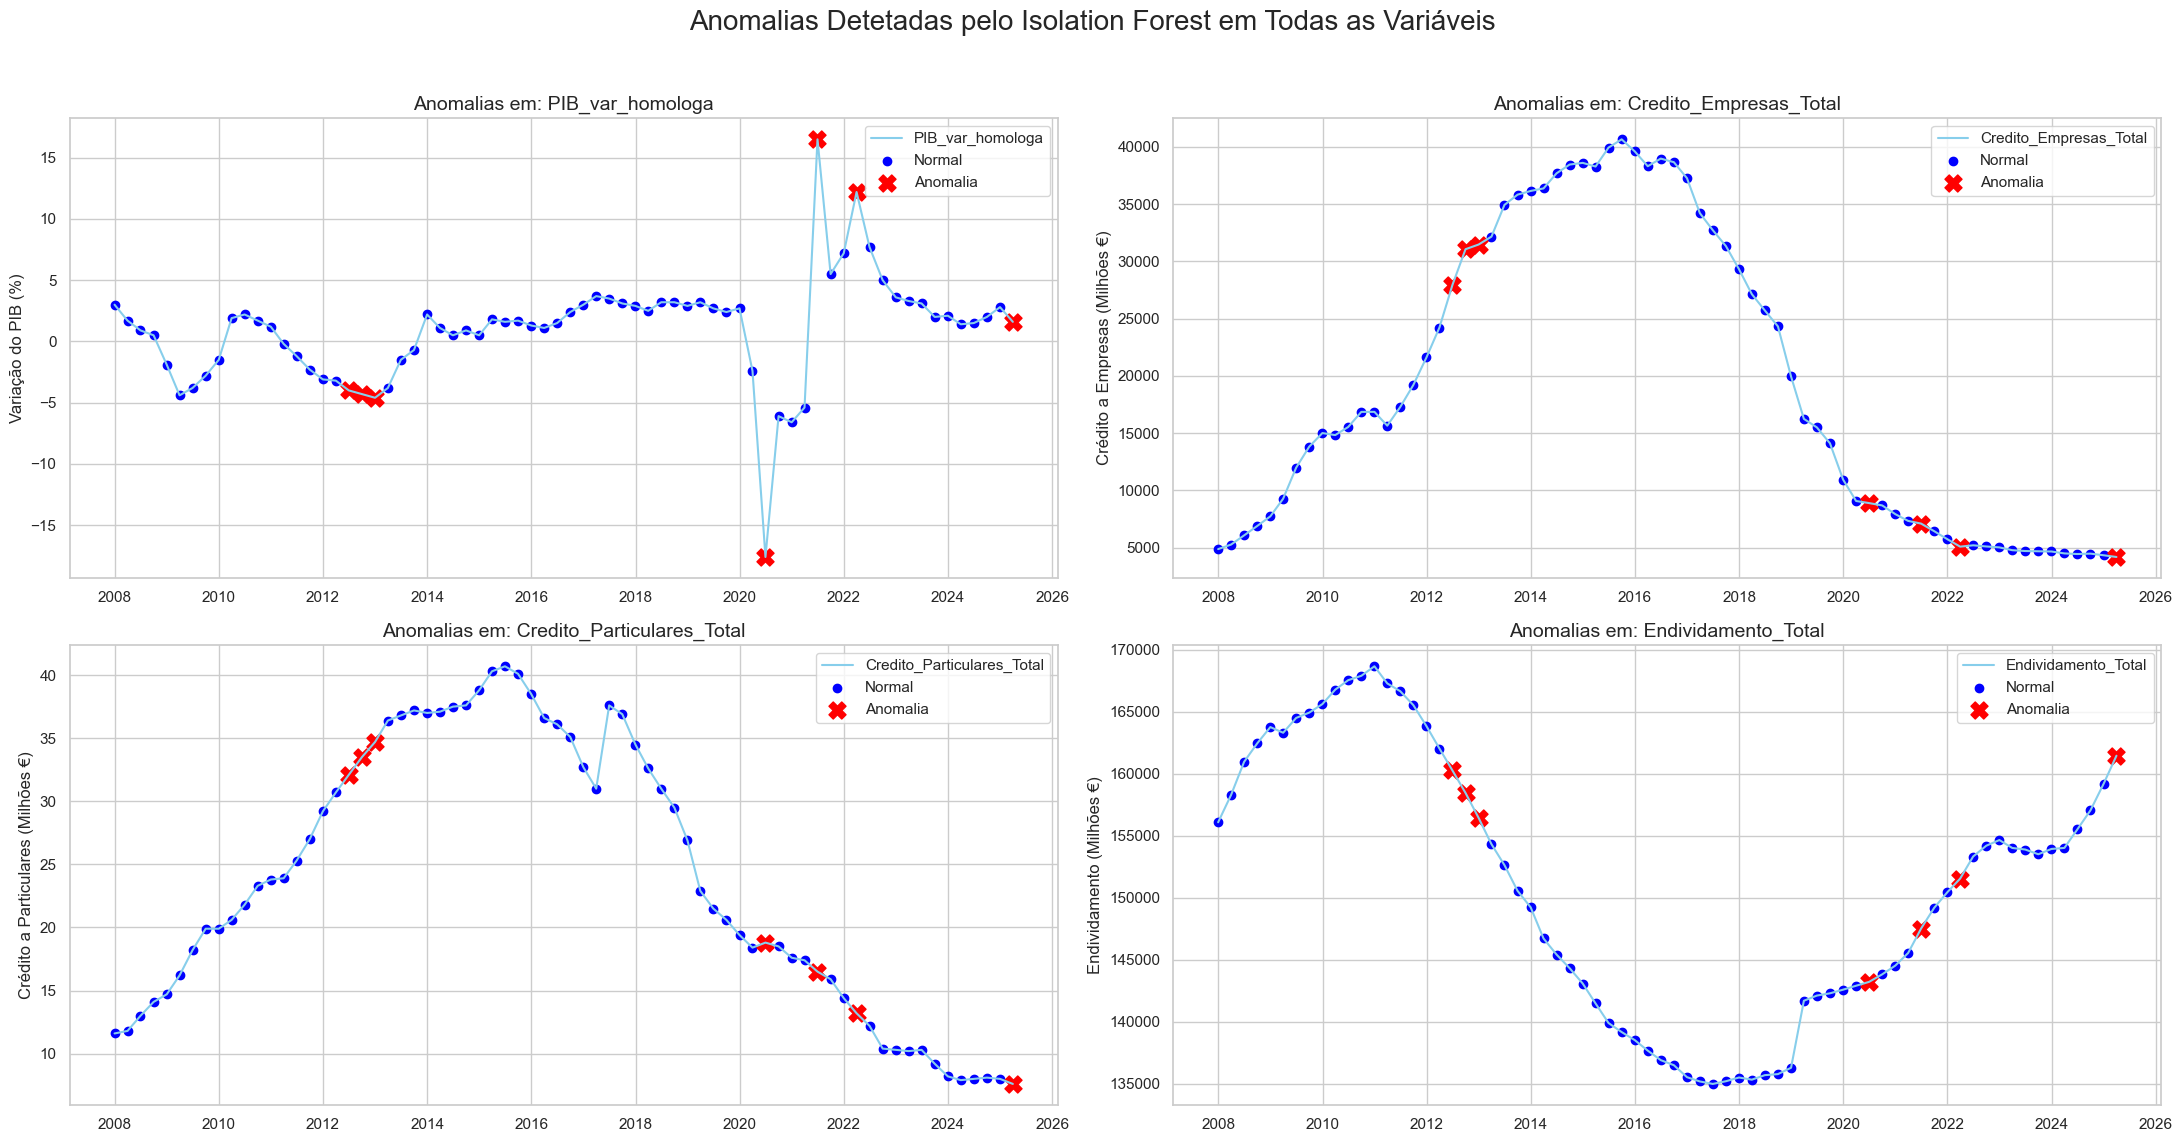

In [6]:
# Os DataFrames 'df_anomalias' e 'df_normais' já foram criados na célula anterior,
# por isso podemos reutilizá-los diretamente.

# Criar uma figura com 4 subplots (2x2) para cada variável
fig, axes = plt.subplots(2, 2, figsize=(22, 12))
fig.suptitle('Anomalias Detetadas pelo Isolation Forest em Todas as Variáveis', fontsize=20)

# Lista de colunas e títulos para iterar e criar os gráficos
colunas = {
    'PIB_var_homologa': ('Variação do PIB (%)', axes[0, 0]),
    'Credito_Empresas_Total': ('Crédito a Empresas (Milhões €)', axes[0, 1]),
    'Credito_Particulares_Total': ('Crédito a Particulares (Milhões €)', axes[1, 0]),
    'Endividamento_Total': ('Endividamento (Milhões €)', axes[1, 1])
}

# Criar cada um dos 4 gráficos
for nome_coluna, (label_y, ax) in colunas.items():
    # Plotar a série temporal completa
    ax.plot(df_final.index, df_final[nome_coluna], color='skyblue', label=nome_coluna)
    
    # Destacar os pontos normais
    ax.scatter(df_normais.index, df_normais[nome_coluna], color='blue', label='Normal')
    
    # Destacar os pontos anómalos com um 'X' vermelho
    ax.scatter(df_anomalias.index, df_anomalias[nome_coluna], color='red', marker='X', s=150, label='Anomalia')
    
    # Configurações do subplot
    ax.set_title(f'Anomalias em: {nome_coluna}', fontsize=14)
    ax.set_ylabel(label_y, fontsize=12)
    ax.legend()
    ax.grid(True)

# Ajustar o layout e mostrar o gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# 8. Deteção de Anomalias com Decomposição STL

In [7]:
from statsmodels.tsa.seasonal import STL

print("Iniciando a deteção de anomalias com Decomposição STL...")

# Lista fixa das colunas que queremos analisar
colunas_para_analise = [
    'PIB_var_homologa',
    'Credito_Empresas_Total',
    'Credito_Particulares_Total',
    'Endividamento_Total'
]

# Criar uma coluna nova para as anomalias da STL, inicializada a 0
df_final['anomaly_stl'] = 0

# 1. Iterar sobre cada uma das nossas 4 variáveis
for coluna in colunas_para_analise:
    print(f"\nProcessando a série: {coluna}")

    # 2. Aplicar a decomposição STL
    stl = STL(df_final[coluna], period=4)
    resultado_stl = stl.fit()
    
    # 3. Calcular os resíduos e o limiar
    residuos = resultado_stl.resid
    limiar = residuos.std() * 2.5 # Usar 2.5 desvios padrão como limiar
    
    # 4. Identificar anomalias nos resíduos
    anomalias_stl = residuos[abs(residuos) > limiar]
    
    if not anomalias_stl.empty:
        print(f"Anomalias encontradas em '{coluna}' nas seguintes datas:")
        display(anomalias_stl.index.date)
        
        # Marcar no DataFrame final com 1 (é anomalia)
        df_final.loc[anomalias_stl.index, 'anomaly_stl'] = 1
    else:
        print(f"Nenhuma anomalia significativa encontrada em '{coluna}'.")

# 5. Sumarizar os resultados finais
print("\n--- Resumo Final da Análise STL ---")
print("Contagem de pontos marcados como anomalia (1) pela STL:")
display(df_final['anomaly_stl'].value_counts())

Iniciando a deteção de anomalias com Decomposição STL...

Processando a série: PIB_var_homologa
Anomalias encontradas em 'PIB_var_homologa' nas seguintes datas:


array([datetime.date(2020, 6, 30), datetime.date(2021, 6, 30)],
      dtype=object)


Processando a série: Credito_Empresas_Total
Anomalias encontradas em 'Credito_Empresas_Total' nas seguintes datas:


array([datetime.date(2011, 9, 30)], dtype=object)


Processando a série: Credito_Particulares_Total
Anomalias encontradas em 'Credito_Particulares_Total' nas seguintes datas:


array([datetime.date(2017, 3, 31), datetime.date(2017, 6, 30)],
      dtype=object)


Processando a série: Endividamento_Total
Anomalias encontradas em 'Endividamento_Total' nas seguintes datas:


array([datetime.date(2018, 12, 31), datetime.date(2019, 3, 31)],
      dtype=object)


--- Resumo Final da Análise STL ---
Contagem de pontos marcados como anomalia (1) pela STL:


anomaly_stl
0    63
1     7
Name: count, dtype: int64

# 9. Comparação de modelos

In [8]:
# Comparação das Anomalias Detetadas

# Converter a coluna 'anomaly' do Isolation Forest para o mesmo formato (0 e 1)
# Atualmente, está como 1 (normal) e -1 (anomalia). Vamos mapear -1 para 1 e 1 para 0.
df_final['anomaly_if'] = df_final['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Selecionar apenas os trimestres onde pelo menos um modelo detetou uma anomalia
df_comparacao = df_final[(df_final['anomaly_if'] == 1) | (df_final['anomaly_stl'] == 1)]

print("--- Comparação de Anomalias (Isolation Forest vs. STL) ---")
print("A tabela abaixo mostra apenas as datas onde pelo menos um modelo encontrou uma anomalia:")
print("'anomaly_if' = Anomalia do Isolation Forest | 'anomaly_stl' = Anomalia da STL")

# Mostrar as colunas relevantes
display(df_comparacao[['anomaly_if', 'anomaly_stl']])

# Calcular a concordância
concordancia = df_final[df_final['anomaly_if'] == df_final['anomaly_stl']]
print(f"\nOs modelos concordam em {len(concordancia)} de {len(df_final)} pontos ({len(concordancia)/len(df_final):.1%}).")

ambos_anomalia = df_final[(df_final['anomaly_if'] == 1) & (df_final['anomaly_stl'] == 1)]
print(f"Datas onde AMBOS os modelos detetaram anomalia:")
display(ambos_anomalia.index.date)

--- Comparação de Anomalias (Isolation Forest vs. STL) ---
A tabela abaixo mostra apenas as datas onde pelo menos um modelo encontrou uma anomalia:
'anomaly_if' = Anomalia do Isolation Forest | 'anomaly_stl' = Anomalia da STL


,anomaly_if,anomaly_stl
Data,,
2011-09-30,0,1
2012-06-30,1,0
2012-09-30,1,0
2012-12-31,1,0
2017-03-31,0,1
2017-06-30,0,1
2018-12-31,0,1
2019-03-31,0,1
2020-06-30,1,1



Os modelos concordam em 60 de 70 pontos (85.7%).
Datas onde AMBOS os modelos detetaram anomalia:


array([datetime.date(2020, 6, 30), datetime.date(2021, 6, 30)],
      dtype=object)

# 10. Deteção de Anomalias com Prophet na Série do PIB

In [9]:
from prophet import Prophet

print("Iniciando a deteção de anomalias com Prophet na série do PIB...")

# 1. Preparar o DataFrame para o Prophet
df_prophet_pib = df_final[['PIB_var_homologa']].reset_index()
df_prophet_pib.rename(columns={'Data': 'ds', 'PIB_var_homologa': 'y'}, inplace=True)

# 2. Inicializar o modelo Prophet
model_prophet = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)

try:
    # 3. Treinar o modelo, especificando o algoritmo 'LBFGS' que é mais robusto
    model_prophet.fit(df_prophet_pib, algorithm='LBFGS')

    # 4. Fazer as previsões para o período histórico
    forecast = model_prophet.predict(df_prophet_pib[['ds']])

    # 5. Juntar as previsões de volta ao nosso DataFrame
    df_final_prophet = pd.concat([df_final, forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]], axis=1)

    # 6. Identificar as anomalias
    df_final_prophet['anomaly_prophet'] = (df_final_prophet['PIB_var_homologa'] < df_final_prophet['yhat_lower']) | (df_final_prophet['PIB_var_homologa'] > df_final_prophet['yhat_upper'])

    # 7. Sumarizar e visualizar os resultados
    anomalias_prophet = df_final_prophet[df_final_prophet['anomaly_prophet']]

    print(f"\nProphet identificou {len(anomalias_prophet)} anomalias na série do PIB.")
    print("Datas das anomalias detetadas pelo Prophet:")
    display(anomalias_prophet.index.date)

    # 8. Visualizar o resultado
    fig = model_prophet.plot(forecast)
    plt.scatter(anomalias_prophet.index, anomalias_prophet['PIB_var_homologa'], color='red', s=100, label='Anomalia')
    plt.title("Previsão do Prophet com Anomalias Detetadas no PIB", fontsize=16)
    plt.xlabel("Data", fontsize=12)
    plt.ylabel("Variação do PIB (%)", fontsize=12)
    plt.legend()
    plt.show()

except Exception as e:
    print(f"\nOcorreu um erro: {e}")
    print("Se o erro persistir, pode ser um problema de instalação do Prophet/CmdStanPy.")

Importing plotly failed. Interactive plots will not work.
13:00:06 - cmdstanpy - INFO - Chain [1] start processing


Iniciando a deteção de anomalias com Prophet na série do PIB...


13:00:06 - cmdstanpy - INFO - Chain [1] done processing
13:00:06 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 
Optimization terminated abnormally. Falling back to Newton.
13:00:06 - cmdstanpy - INFO - Chain [1] start processing
13:00:06 - cmdstanpy - INFO - Chain [1] done processing
13:00:06 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 3221225657 



Ocorreu um erro: Error during optimization! Command 'C:\Users\Calhaugamer555\anaconda3\envs\analise_macro\Lib\site-packages\prophet\stan_model\prophet_model.bin random seed=17767 data file=C:\Users\CALHAU~1\AppData\Local\Temp\tmpa3ve0hd2\pkybw7pd.json init=C:\Users\CALHAU~1\AppData\Local\Temp\tmpa3ve0hd2\uqpynvhp.json output file=C:\Users\CALHAU~1\AppData\Local\Temp\tmpa3ve0hd2\prophet_modelxc0jzhnu\prophet_model-20250730130006.csv method=optimize algorithm=newton iter=10000' failed: 
Se o erro persistir, pode ser um problema de instalação do Prophet/CmdStanPy.
